#### Importing what we need. Note how I increase the size of all figures for visibility purposes.

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10] ## set the size of all figures

#### Defining the "distance" functions we will use. The Euclidean distance is simply a proxy (and is unused here); instead, we use the Haversine distance which is more realistic.

The code for the Haversine distance has been taken from [here](https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points). All distances are in miles (for the Haversine). Should we need kilometers, simply edit the radius of the Earth!

In [6]:
import math
def euclidean(x,y): # instead of the Haversine distance <- We should be using Haversine, this is simply a proxy
    return math.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

def haversine(x,y): # Code taken from https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
    lon1=x[0]
    lat1=x[1]
    lon2=y[0]
    lat2=y[1]
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 3956 # This value does *not* affect the spanning tree calculations! 
    # It is the radius of the earth (needed for the Haversine calculation) in miles. It would be 6371 for kilometers. 
    return c*r

#### Here, we use *pandas* a very useful package that allows us to read and manipulate database information.

In [7]:
import pandas as pd
df=pd.read_csv("illinois.csv")
df=df.dropna(how="any") # removes rows with missing data
#df=df.sample(n=100) # Uncomment this to pick a sample of the zip codes rather than all of them.

#### Next, we create our graph. First though we do some data wrangling to get the data to "behave" the way we'd like it to.

In [8]:
from itertools import combinations
x=df["longitude"].tolist() # Longitude corresponds to the x axis.
y=df["latitude"].tolist() # Latitude corresponds to the y axis.
z=df["zip_code"].tolist() # getting all zip codes
# Getting them in list form ensures we can access them all at the same time with the same index.
# For example x[101], y[101], and z[101] would all return the 102nd zip code's longitude, latitude, and zip code value.
zipcodes={}
pos={}
for i in range(len(x)):
    zipcodes[z[i]]=(x[i],y[i]) # storing (x,y) information for each zip code
    pos[z[i]]=(x[i],y[i]) # also storing them to position the nodes in the end.
    # Fixing the position of the nodes in the graph makes for a more "realistic" plot of Illinois!
    # Unnecessary, but looks nice (when we plot).

G=nx.Graph() 
addList=[]
for (i,j) in combinations(zipcodes,2):
    distance=haversine(zipcodes[i],zipcodes[j])
    addList.append(distance)
    G.add_edge(i,j,weight=distance) # creating the graph one pair of zip codes at a time

In [9]:
## As a quick check, let's get the number of nodes and number of edges. The graph is pretty big (expectedly)!
print(G.number_of_nodes(), G.number_of_edges())

1590 1263255


#### Drawing the graph may take a while longer. The graph is pretty big. For visualization purposes, we make the width of the edges and the size of the nodes pretty small. I am also removing all labels!

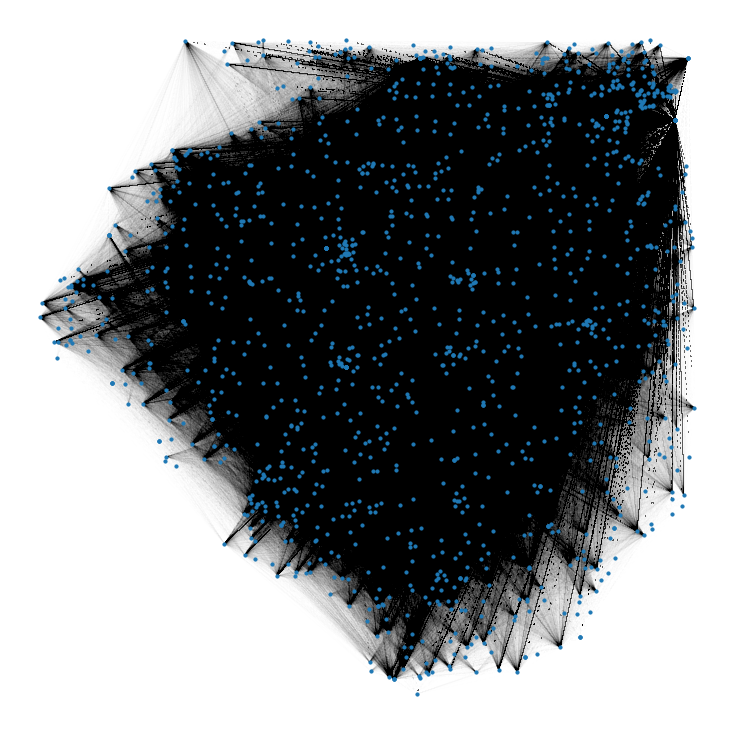

In [10]:
nx.draw(G,pos, with_labels=False, node_size=10, width=0.001) # drawing the graph. This may take a while depending on your computer!

### Spanning tree calculations
#### For the spanning tree, simply use networkx's ```minimum_spanning_tree``` functionality.

In [1]:
T=nx.minimum_spanning_tree(G) # getting the minimum cost spanning tree

NameError: name 'nx' is not defined

#### We now need to make a plotting decision: do we show *everything* or do we *only* show the tree? We sho

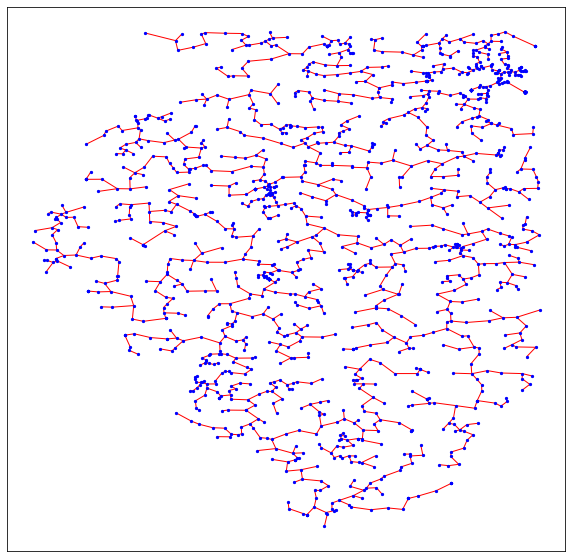

In [12]:
## Plotting only the tree

ered=[(i,j) for (i,j) in T.edges()] # selecting the edges in the tree (so that we can edit them in the plot)
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(), node_color='b', node_size=5)
nx.draw_networkx_edges(G,pos,edgelist=ered, edge_color='r', width=1)

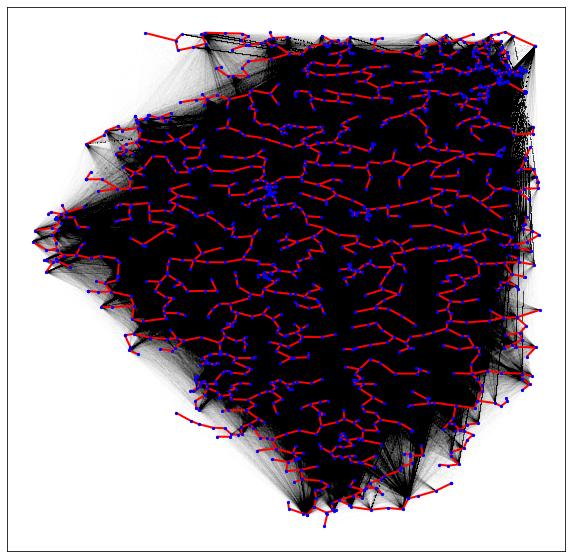

In [13]:
## Plotting all the edges (in red, the edges in the tree)

ered=[(i,j) for (i,j) in T.edges()] # selecting the edges in the tree (so that we can edit them in the plot)
nx.draw_networkx_edges(G,pos,edgelist=G.edges(), edge_color='k', width=0.001)
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(), node_color='b', node_size=5)
nx.draw_networkx_edges(G,pos,edgelist=ered, edge_color='r', width=2)

#### Finally, we may want to plot the total *cost* (i.e., distance) or maybe the mean or max?

In [14]:
totalCost=sum(d['weight'] for (i,j,d) in T.edges(data=True))
print(totalCost)
avgCost=sum(d['weight'] for (i,j,d) in T.edges(data=True))/T.number_of_edges()
print(avgCost)
maxCost=max(d['weight'] for (i,j,d) in T.edges(data=True))
print(maxCost)

5461.7097356145205
3.4371993301538835
13.66565409491674
